In [3]:
import torch 
import matplotlib.pyplot as plt

from torch.distributions import Normal, MixtureSameFamily, Categorical, Independent
import torch

from rbi.utils.datasets import get_datasets, get_reference_posterior_fn
from rbi.utils.nets import SplineAutoregressiveModel, MixtureDiagGaussianModel, IndependentGaussianNet
from rbi.defenses.regularized_loss import GaussianNoiseJacobiRegularizer, GaussianNoiseTransformRegularizer
from rbi.loss.loss_fn import NLLLoss

In [4]:
from rbi.defenses.regularized_pre_loss import IntervalBoundPropagation
from rbi.utils.interval import Symbolic_interval

In [45]:
net = MixtureDiagGaussianModel(1,1, hidden_dims=[20,20], num_components=4)
loss_fn = NLLLoss(net)
defense = IntervalBoundPropagation(net, loss_fn)

In [50]:
X = torch.randn((10000,)).reshape(-1,1)
Y = X**2 + torch.randn_like(X)*0.5
Y[5000:] += X[5000:]

In [51]:
optim = torch.optim.Adam(net.parameters())

for i in range(500):
    optim.zero_grad()
    loss = loss_fn(X,Y)
    loss.backward()
    optim.step()
    print(loss)

tensor([0.9850], grad_fn=<AddBackward0>)
tensor([0.9845], grad_fn=<AddBackward0>)
tensor([0.9839], grad_fn=<AddBackward0>)
tensor([0.9836], grad_fn=<AddBackward0>)
tensor([0.9832], grad_fn=<AddBackward0>)
tensor([0.9829], grad_fn=<AddBackward0>)
tensor([0.9827], grad_fn=<AddBackward0>)
tensor([0.9823], grad_fn=<AddBackward0>)
tensor([0.9821], grad_fn=<AddBackward0>)
tensor([0.9819], grad_fn=<AddBackward0>)
tensor([0.9817], grad_fn=<AddBackward0>)
tensor([0.9814], grad_fn=<AddBackward0>)
tensor([0.9811], grad_fn=<AddBackward0>)
tensor([0.9809], grad_fn=<AddBackward0>)
tensor([0.9807], grad_fn=<AddBackward0>)
tensor([0.9805], grad_fn=<AddBackward0>)
tensor([0.9803], grad_fn=<AddBackward0>)
tensor([0.9801], grad_fn=<AddBackward0>)
tensor([0.9799], grad_fn=<AddBackward0>)
tensor([0.9797], grad_fn=<AddBackward0>)
tensor([0.9795], grad_fn=<AddBackward0>)
tensor([0.9792], grad_fn=<AddBackward0>)
tensor([0.9790], grad_fn=<AddBackward0>)
tensor([0.9788], grad_fn=<AddBackward0>)
tensor([0.9786],

In [52]:


net_interval = defense.interval_model

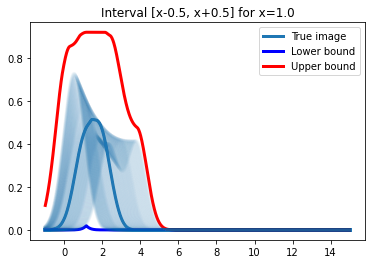

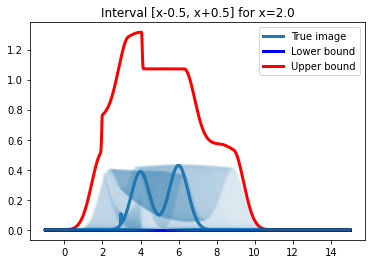

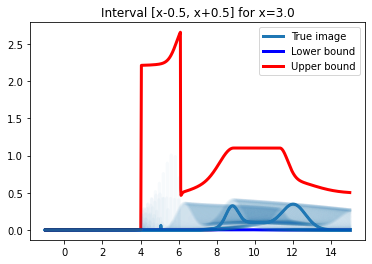

In [55]:
for j in [1.,2.,3.]:
    x = torch.tensor([[j]])
    eps=0.5
    x_int = Symbolic_interval(x-eps, x+eps)


    y = torch.linspace(-1,15, 1000).reshape(-1,1)
    logp = net(x).log_prob(y).exp()
    logp_int = net_interval(x_int).log_prob(y).exp()


    plt.title(f"Interval [x-{eps}, x+{eps}] for x={j}")
    plt.plot(y,logp.detach(), lw=3)
    plt.plot(y,logp_int.l.detach(), lw=3, color="blue")
    plt.plot(y,logp_int.u.detach(), lw=3, color="red")
    plt.legend(["True image", "Lower bound", "Upper bound"])

    intervals = torch.linspace(float(x-eps), float(x+eps), 200)
    for i in intervals:
        plt.plot(y,net(torch.tensor([[i]])).log_prob(y).exp().detach(), alpha=0.03, lw=3, color="C0")

    
    plt.savefig(f"mixture_gaussian_ibp_{j}.svg")
    plt.savefig(f"mixture_gaussian_ibp_{j}.png")
    plt.show()
